# Defining The Farhadifar Model

In [19]:
# Suppressing warnings resulting from downgrading pandas to 1.5.3
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

# Core object
from tyssue import Sheet
# Simple 2D geometry
from tyssue import PlanarGeometry as geom
# Visualisation
from tyssue.draw import sheet_view
# Model Creation
from tyssue.dynamics import model_factory, effectors
from tyssue.dynamics.planar_vertex_model import PlanarModel
from tyssue.solvers import QSSolver

from tyssue.draw.plt_draw import plot_forces

,y,is_alive,perimeter,area,x,num_sides,id
face,,,,,,,
0,1.795695,1,3.882622,0.687898,1.077417,4,0
1,1.596174,1,4.521091,1.299363,1.915409,5,0
2,1.596174,1,4.521091,1.299363,2.873113,5,0
3,1.702585,1,3.295957,0.305732,3.511582,3,0
4,2.873113,1,3.882622,0.687898,0.718278,4,0
5,2.873113,1,4.572896,1.375796,1.436556,6,0
6,2.873113,1,4.572896,1.375796,2.394261,6,0
7,2.873113,1,4.572896,1.375796,3.351965,6,0
8,3.950530,1,3.882622,0.687898,1.077417,4,0


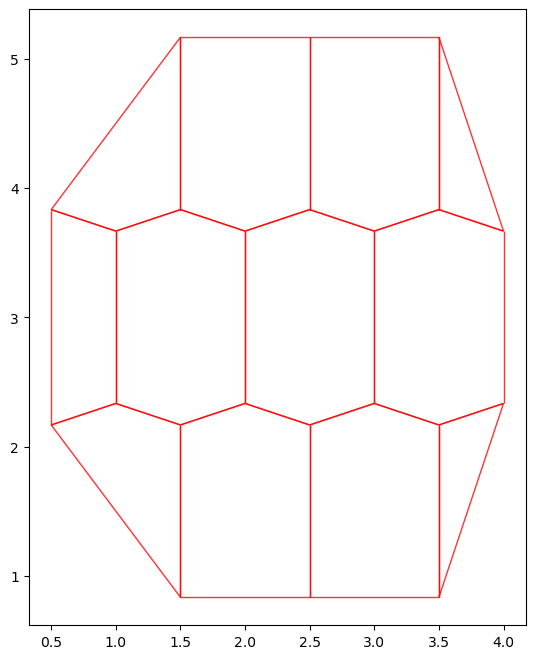

In [20]:
sheet = Sheet.planar_sheet_2d(
    'test_sheet',
    nx = 5,
    ny = 5,
    distx = 1,
    disty = 1.5
)

sheet.sanitize(trim_borders=True, order_edges=True)
geom.update_all(sheet)

fig, ax = sheet_view(
    sheet,
    mode = "2D",
    edge = {"color": "red", "width": 1}
)

sqrt_area = sheet.datasets['face']['area'].mean()**0.5
geom.scale(sheet, 1/sqrt_area, sheet.coords)
geom.update_all(sheet)

display(sheet.datasets['face'])

fig.set_size_inches(8, 8)

Reseting column is_alive of the face dataset with new specs
Reseting column perimeter of the face dataset with new specs
Reseting column area of the face dataset with new specs
Reseting column sub_area of the edge dataset with new specs


Total energy:  131.764


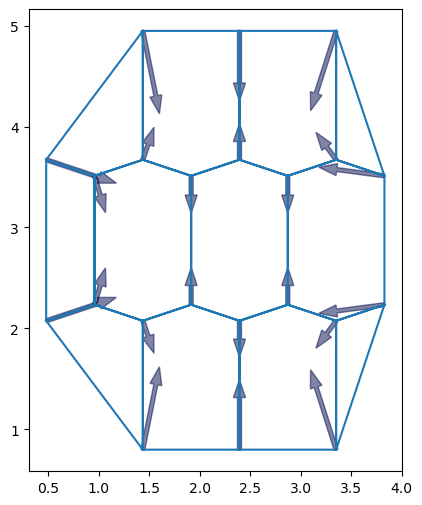

In [21]:
model = PlanarModel

sheet.update_specs(model.specs, reset=True)
geom.update_all(sheet)
energy = model.compute_energy(sheet)
print(f'Total energy: {energy: .3f}')

fig, ax = plot_forces(sheet, geom, model, ['x', 'y'], scaling=0.05)
fig.set_size_inches(5, 6)

Successfull gradient descent?  True


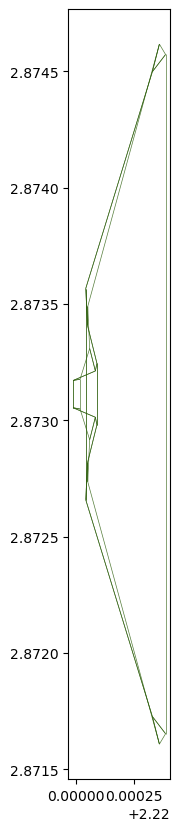

In [22]:
specs = {
    'edge': {
        'is_active': 1,
        'line_tension': 0.12,
        'ux': 0.0,
        'uy': 0.0,
        'uz': 0.0
    },
   'face': {
       'area_elasticity': 1.0,
       'contractility': 0.04,
       'is_alive': 1,
       'prefered_area': 1.0},
   'settings': {
       'grad_norm_factor': 1.0,
       'nrj_norm_factor': 1.0
   },
   'vert': {
       'is_active': 1
   }
}

# Update the specs (adds / changes the values in the dataframes' columns)
sheet.update_specs(specs)

# Find energy minimum
solver = QSSolver()
res = solver.find_energy_min(sheet, geom, model)

print("Successfull gradient descent? ", res['success'])
fig, ax = sheet_view(sheet)

fig.set_size_inches(10, 10)
ax.set_aspect('equal')
